In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [7]:
torch.manual_seed(0)
np.random.seed(0)

x_train = torch.linspace(-10, 10, 1000).unsqueeze(1)
y_train = x_train ** 3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x_train = x_train.to(device)
y_train = y_train.to(device)
device

device(type='cpu')

#### NN Layer without Activation Function

In [9]:
class NetNoActivation(nn.Module):
    def __init__(self):
        super(NetNoActivation, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1,50),
            nn.Linear(50,50),
            nn.Linear(50,50),
            nn.Linear(50,50),
            nn.Linear(50,1)
        )

    def forward(self, x):
        return self.model(x)

#### NN Layer with Actication Fucntion

In [14]:
class NetWithReLU(nn.Module):
    def __init__(self):
        super(NetWithReLU, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )

    def forward(self, x):
        return self.model(x)

In [15]:
def train_model(model, x, y, epochs=1000, lr=0.001):
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    return model

In [16]:
def plot_results(model, title):
    model.eval()
    with torch. no_grad():
        x_plot = torch.linspace(-10, 10, 1000).unsqueeze(1).to(device)
        y_true = x_plot ** 3
        y_pred = model(x_plot)

    x_plot = x_plot.cpu().numpy()
    y_true = y_true.cpu().numpy()
    y_pred = y_pred.cpu().numpy()

    plt.plot(x_plot, y_true, label='True $x^3$', color='blue')
    plt.plot(x_plot, y_pred, label='Model Prediction', color='red')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

Training network without activation functions...
Epoch [100/1000], Loss: 23043.9824
Epoch [200/1000], Loss: 22994.4453
Epoch [300/1000], Loss: 22994.4434
Epoch [400/1000], Loss: 22994.4434
Epoch [500/1000], Loss: 22994.4473
Epoch [600/1000], Loss: 22994.4434
Epoch [700/1000], Loss: 22994.4473
Epoch [800/1000], Loss: 22994.4434
Epoch [900/1000], Loss: 22994.4453
Epoch [1000/1000], Loss: 22994.4434


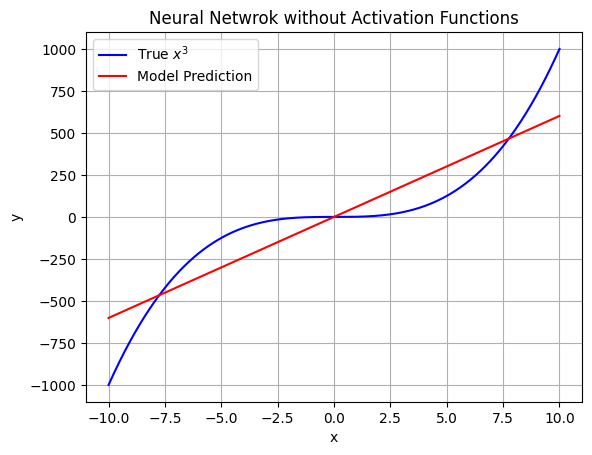

Training network with Activation functions...
Epoch [100/1000], Loss: 21899.3516
Epoch [200/1000], Loss: 15065.8467
Epoch [300/1000], Loss: 6972.7524
Epoch [400/1000], Loss: 4336.6250
Epoch [500/1000], Loss: 1211.1331
Epoch [600/1000], Loss: 256.8902
Epoch [700/1000], Loss: 88.8033
Epoch [800/1000], Loss: 38.7795
Epoch [900/1000], Loss: 30.4542
Epoch [1000/1000], Loss: 30.8355


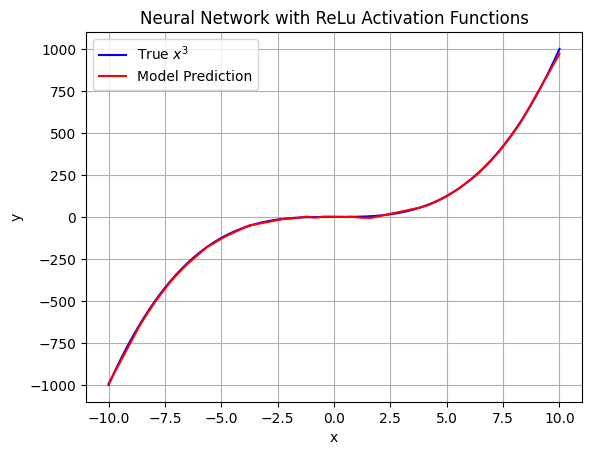

In [17]:
print('Training network without activation functions...')
model_no_act = NetNoActivation()
model_no_act = train_model(model_no_act, x_train, y_train, epochs=1000, lr=0.001)
plot_results(model_no_act, 'Neural Netwrok without Activation Functions')

print('Training network with Activation functions...')
model_with_relu = NetWithReLU()
model_with_relu = train_model(model_with_relu, x_train, y_train, epochs=1000, lr=0.001)
plot_results(model_with_relu, 'Neural Network with ReLu Activation Functions')